In [1]:
\l E:\pycharm\PycharmProjects\kdbq\columbiaHdb\
\c 20 5200
/distinct date
dts:select distinct date from bin10
dts_list: exec date from dts
\s

6i


# 1

In [ ]:
ret:{[mid;dt] (neg 1) + mid%(xprev[6*dt;mid])}
dI:{[I;dt] I- xprev[6*dt;I]}
computeImpact: {[trade;vol;adv;h] 
    dt:1;
    beta: (log 2)%h*6;
    dv:vol*sqrt 6*60*6.5;
    lamb:1;
    b:beta*dt;
    (neg count trade)#ema[b;][0,lamb*dv*trade%adv*b]}

w5_proc:{[day]
    data:select from bin10 where date=day;
    data: update reverse fills reverse date,
     reverse fills reverse mid,
     reverse fills reverse spread,
     reverse fills reverse vol,
     reverse fills reverse adv
     by id from data;
    hs: 1 5 30 60;
    dt : 1 15 60;
    tb2:data cross ([]hs:hs);
    /compute impact
    tb3: update I: computeImpact[trade;vol;adv;first hs] by id,hs from tb2;
    tb3:tb3 cross ([]dt:dt);
    /compute ret and delta impact across each id,halflife,prediction horizon
    tb3: update ret: ret[mid;first dt],delta_I: dI[I;first dt] by id,hs,dt from tb3;
    show tb3;
    / compute cov(x,y), var(x),var(y), assuming expectation of x,y to be zero
    0!select cov_r_dI: avg ret*delta_I,var_dI: avg delta_I*delta_I,var_ret: avg ret*ret by date,id,hs,dt from tb3 / unkeyed keyed table
    }

# 2

In [ ]:
\t tb2:raze w5_proc each dts_list /loop through each date

In [ ]:
/for debugging,I already run the loop stated above and save the results. 
save `E:/pycharm/PycharmProjects/kdbq/w6/tb2

In [3]:
/Having saved data,we dont have to run the loop over and over again for further questions but just loading
load `E:/pycharm/PycharmProjects/kdbq/w6/tb2

`tb2


In [4]:
select from tb2 where date=2019.01.09 /var_dI is abnormally larger than those in other dates, so we drop them
tb2:select from tb2 where date <>2019.01.09

date       id hs dt cov_r_dI      var_dI        var_ret      
-------------------------------------------------------------
2019.01.09 0  1  1  9.82319e-007  1.233983e-005 1.681519e-006
2019.01.09 0  1  15                                          
2019.01.09 0  1  60                                          
2019.01.09 0  5  1  2.25097e-006  1.524191e-005 1.681519e-006
2019.01.09 0  5  15                                          
2019.01.09 0  5  60                                          
2019.01.09 0  30 1  2.547833e-006 1.559524e-005 1.681519e-006
2019.01.09 0  30 15                                          
2019.01.09 0  30 60                                          
2019.01.09 0  60 1  2.576632e-006 1.560088e-005 1.681519e-006
2019.01.09 0  60 15                                          
2019.01.09 0  60 60                                          
2019.01.09 1  1  1  8.924691e-006 3.32483e-005  9.088817e-006
2019.01.09 1  1  15                                          
2019.01.

# 3

compute lambda and in sample r2 by $R^2 = \frac{cov^2(ret,\Delta I)}{var(ret)var(\Delta I)}$

In [5]:
tb3:select cov_r_dI_avg: avg cov_r_dI,var_dI_avg:avg var_dI,var_ret_avg:avg var_ret,lambda: (avg cov_r_dI )% avg var_dI ,r2:((avg cov_r_dI) xexp 2) % (avg var_ret)* (avg var_dI) by id,hs,dt from tb2
tb3

id hs dt| cov_r_dI_avg  var_dI_avg    var_ret_avg   lambda   r2         
--------| --------------------------------------------------------------
0  1  1 | 6.332068e-009 1.59222e-009  4.571967e-007 3.976879 0.05507885 
0  1  15| 9.456792e-009 2.74183e-009  5.782069e-006 3.44908  0.0056411  
0  1  60| 1.090928e-008 2.740143e-009 1.853e-005    3.98128  0.002343923
0  5  1 | 9.485479e-009 1.903654e-009 4.571967e-007 4.982775 0.1033778  
0  5  15| 5.258445e-008 1.107283e-008 5.782069e-006 4.748964 0.04318898 
0  5  60| 6.382686e-008 1.379143e-008 1.853e-005    4.628009 0.01594125 
0  30 1 | 1.026225e-008 1.999534e-009 4.571967e-007 5.132319 0.1152002  
0  30 15| 1.089653e-007 2.434472e-008 5.782069e-006 4.475933 0.08435069 
0  30 60| 2.718348e-007 7.615104e-008 1.853e-005    3.56968  0.05236715 
0  60 1 | 1.033966e-008 2.018941e-009 4.571967e-007 5.121326 0.1158205  
0  60 15| 1.182957e-007 2.819307e-008 5.782069e-006 4.195914 0.08584446 
0  60 60| 3.620342e-007 1.132729e-007 1.853e-005   

In [6]:
save `E:/pycharm/PycharmProjects/kdbq/w6/tb3.csv

`:E:/pycharm/PycharmProjects/kdbq/w6/tb3.csv


Employing embedpy for plotting

C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
C:\Users\zhuyu\anaconda3\envs\jupyterqenv\lib\site-packages\numpy\core\getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


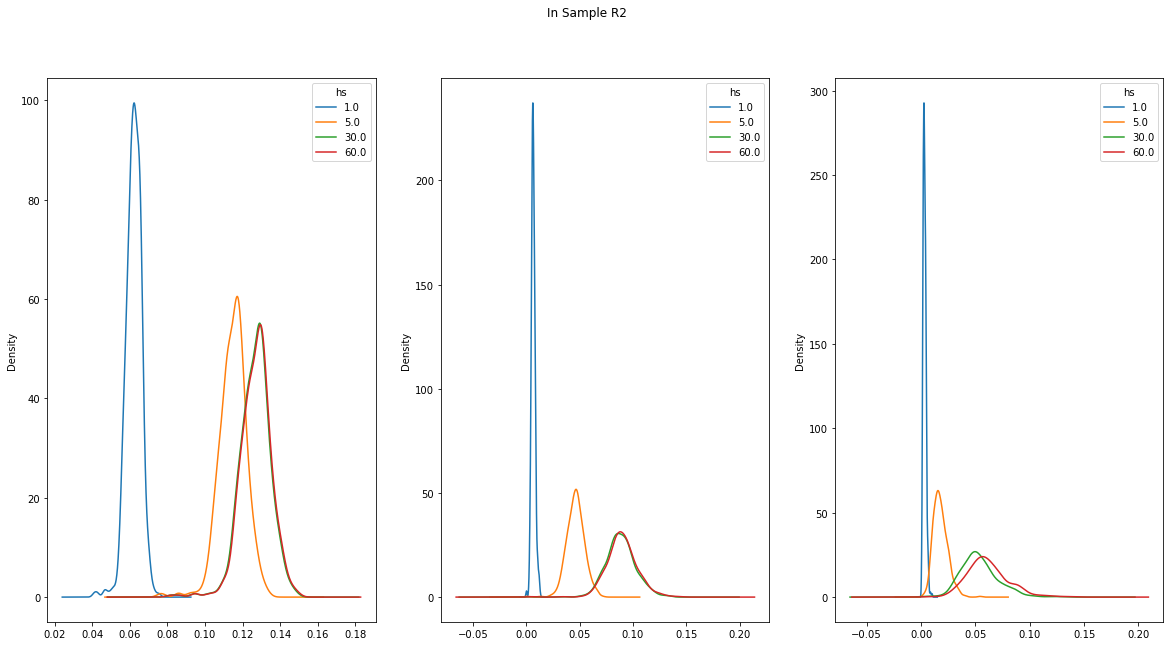

In [7]:
p)import matplotlib.pyplot as plt
p)import pandas as pd
p)q3=pd.read_csv('E:/pycharm/PycharmProjects/kdbq/w6/tb3.csv')
p)q3_1 = q3.pivot_table(index=['id'],columns=['dt','hs'],values='r2').T.reset_index()
p)f,ax = plt.subplots(1,3,figsize=(20,10))
p)q3_1.where(q3_1.loc[:,'dt']==1).dropna().set_index('hs').drop(columns='dt').T.plot(ax=ax[0],kind='kde')
p)q3_1.where(q3_1.loc[:,'dt']==15).dropna().set_index('hs').drop(columns='dt').T.plot(ax=ax[1],kind='kde')
p)q3_1.where(q3_1.loc[:,'dt']==60).dropna().set_index('hs').drop(columns='dt').T.plot(ax=ax[2],kind='kde')
p)f.suptitle('In Sample R2')
p)plt.show()

# 4

In [8]:
/compute average covariance,variance of return and delta_I froeach month,halflife and delta_t
tb4:select cov_avg:avg cov_r_dI,var_ret_avg:avg var_ret,var_dI_avg:avg var_dI by date.month,hs,dt from tb2
/compute lambda for each month
tb4:update lambda:cov_avg%var_dI_avg by month,hs,dt from tb4
/use xprev to extract last month' s lambda corresponding to each halflife and delta t
tb4_1: update last_lambda: xprev[12;lambda] from tb4


In [9]:
tb4_1

month   hs dt| cov_avg       var_ret_avg   var_dI_avg    lambda   last_lambda
-------------| --------------------------------------------------------------
2019.01 1  1 | 1.061227e-008 8.504912e-007 2.274915e-009 4.664907            
2019.01 1  15| 1.363286e-008 9.99009e-006  3.972498e-009 3.431811            
2019.01 1  60| 1.49076e-008  3.39225e-005  4.021172e-009 3.707277            
2019.01 5  1 | 1.574479e-008 8.504912e-007 2.73372e-009  5.759474            
2019.01 5  15| 7.749386e-008 9.99009e-006  1.66882e-008  4.643634            
2019.01 5  60| 8.343905e-008 3.39225e-005  2.141333e-008 3.896593            
2019.01 30 1 | 1.697444e-008 8.504912e-007 2.89226e-009  5.868919            
2019.01 30 15| 1.602047e-007 9.99009e-006  3.809911e-008 4.204946            
2019.01 30 60| 3.465419e-007 3.39225e-005  1.230959e-007 2.815218            
2019.01 60 1 | 1.709284e-008 8.504912e-007 2.927338e-009 5.839039            
2019.01 60 15| 1.735431e-007 9.99009e-006  4.467786e-008 3.88431

calculate out of sample R2 by $R^2 = \beta \frac{var(\Delta I)}{var(ret)}(2\frac{cov(ret,\Delta I)}{var(\Delta I)}-\beta)$

In [10]:
tb4_2: select oop_r2: last_lambda*((neg last_lambda)+2*cov_avg%var_dI_avg) *var_dI_avg%var_ret_avg by month,hs,dt from tb4_1

In [11]:
/ drop the first month as it has no last_lambda
tb4_2: select from tb4_2 where month>2019.01m
tb4_2

month   hs dt| oop_r2     
-------------| -----------
2019.02 1  1 | 0.06879414 
2019.02 1  15| 0.007566028
2019.02 1  60| 0.003866106
2019.02 5  1 | 0.1251936  
2019.02 5  15| 0.05174091 
2019.02 5  60| 0.0206498  
2019.02 30 1 | 0.1381465  
2019.02 30 15| 0.1008356  
2019.02 30 60| 0.05948446 
2019.02 60 1 | 0.1387218  
2019.02 60 15| 0.1024041  
2019.02 60 60| 0.06728923 
2019.03 1  1 | 0.0651612  
2019.03 1  15| 0.00660045 
2019.03 1  60| 0.00302121 
..


In [12]:
save `E:/pycharm/PycharmProjects/kdbq/w6/tb4_2.csv

`:E:/pycharm/PycharmProjects/kdbq/w6/tb4_2.csv


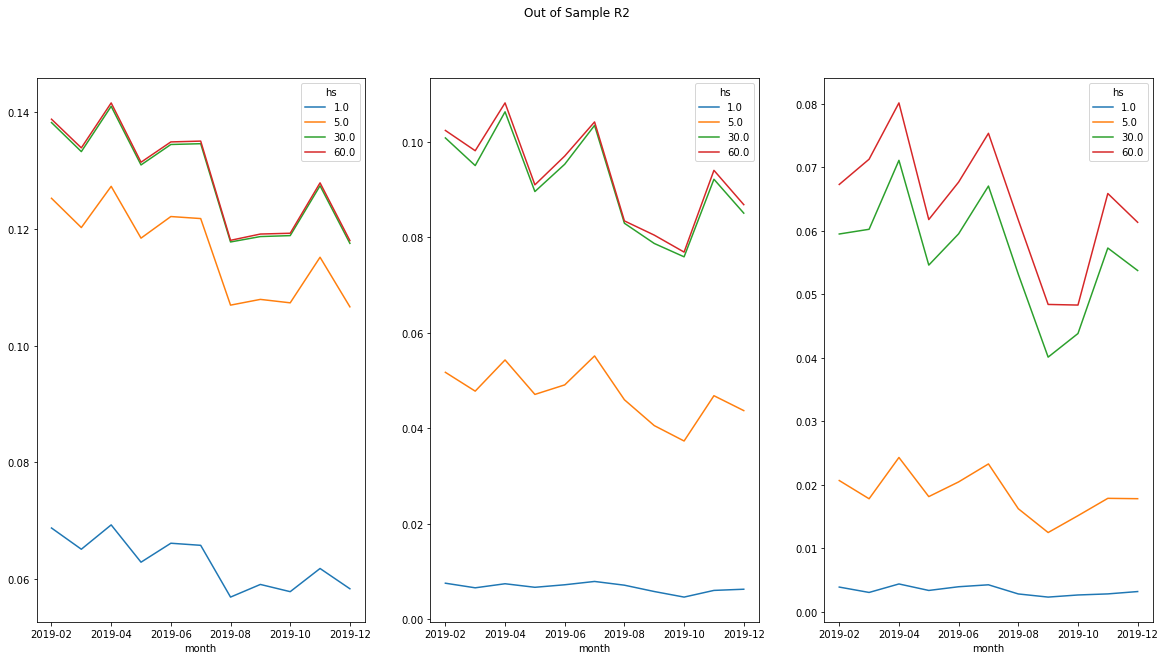

In [14]:
p)import matplotlib.pyplot as plt
p)import pandas as pd
p)q42=pd.read_csv('E:/pycharm/PycharmProjects/kdbq/w6/tb4_2.csv')
p)q42 = q42.pivot_table(index=['month'],columns=['dt','hs'],values='oop_r2').T.reset_index()
p)f,ax = plt.subplots(1,3,figsize=(20,10))
p)q42.where(q42.loc[:,'dt']==1).dropna().set_index('hs').drop(columns='dt').T.plot(ax=ax[0])
p)q42.where(q42.loc[:,'dt']==15).dropna().set_index('hs').drop(columns='dt').T.plot(ax=ax[1])
p)q42.where(q42.loc[:,'dt']==60).dropna().set_index('hs').drop(columns='dt').T.plot(ax=ax[2])
p)f.suptitle('Out of Sample R2')
p)plt.show()